### 大样本的意义

当我们增加样本容量时，即使是最小的差异看起来也可能变得非常显著。 

为了说明这一点，请完成这个 notebook 和下面的测试题目。

首先，导入库和数据。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')

In [2]:
full_data.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


1. 在这个案例中，假设我们想要测试 `full_data` 中所有个体的平均身高是否等于67.60英寸或 **不等于** 67.60 英寸。  首先，通过下面的 **测试 1** 来确定这些案例的零假设和备择假设。

$$H_0:\mu_{height}=67.60$$
$$H_1:\mu_{height}\neq67.60$$

2. 人口平均身高是多？人口身高的标准差是多少？使用下面的代码创建一组样本数据。样本的平均身高是多少？模拟五个值的平均值的抽样分布，查看其形状并绘制一个直方图。这五次抽样的平均值的抽样分布的标准差是多少？回答下面的 **测试 2** ，确保你的答案是正确的。

In [3]:
full_data.height.mean()

67.59748697307937

In [4]:
full_data.height.std()

3.119433206550344

In [15]:
sample1 = full_data.sample(5)
sample1

,user_id,age,drinks_coffee,height
955,3228,>=21,True,66.525889
2629,7459,<21,True,63.319838
2811,4208,>=21,True,68.468615
1749,4216,<21,False,63.582115
1236,3699,>=21,True,69.045293


In [16]:
sample1.height.mean()

66.18834984138284

In [20]:
t = []
for i in range(10):
    b1 = sample1.sample(5,replace = True)
    t.append(b1)
t

[      user_id   age  drinks_coffee     height
 2811     4208  >=21           True  68.468615
 1236     3699  >=21           True  69.045293
 955      3228  >=21           True  66.525889
 1236     3699  >=21           True  69.045293
 2811     4208  >=21           True  68.468615,
       user_id   age  drinks_coffee     height
 2629     7459   <21           True  63.319838
 1236     3699  >=21           True  69.045293
 2811     4208  >=21           True  68.468615
 2629     7459   <21           True  63.319838
 1749     4216   <21          False  63.582115,
       user_id   age  drinks_coffee     height
 1236     3699  >=21           True  69.045293
 1236     3699  >=21           True  69.045293
 955      3228  >=21           True  66.525889
 1749     4216   <21          False  63.582115
 955      3228  >=21           True  66.525889,
       user_id   age  drinks_coffee     height
 955      3228  >=21           True  66.525889
 2811     4208  >=21           True  68.468615
 955      

+ 根据以上代码和输出内容，判断在进行bootstrap的时候，不应该使用sample1,而是full_data来进行sample.

(array([3.000e+00, 2.800e+01, 2.300e+02, 8.830e+02, 2.146e+03, 3.090e+03,
        2.454e+03, 9.740e+02, 1.780e+02, 1.400e+01]),
 array([61.48630745, 62.59060021, 63.69489296, 64.79918571, 65.90347846,
        67.00777122, 68.11206397, 69.21635672, 70.32064948, 71.42494223,
        72.52923498]),
 <a list of 10 Patch objects>)

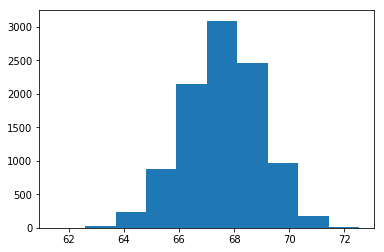

In [9]:
height_means = []
for _ in range(int(1e4)):
    bootstrap_sample = full_data.sample(5,replace = True)
    height_means.append(bootstrap_sample.height.mean())
    
plt.hist(height_means)

In [10]:
np.std(height_means)

1.379823195399354

3. 使用问题1中的零假设和备择假设以及问题2中抽样分布的结果，模拟你在零假设中的期望平均值。使用这些模拟值来确定一个p值，做出一个关于零假设和备择假设的决定。通过下面的 **测试 3** 和 **测试 4** 来检查你的解决方案。

  **提示:**  [这里](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) 的 Numpy 文件可以帮你完成你的解决方案。

+ 第一种方法

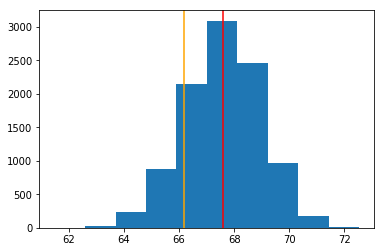

In [55]:
null_mean = np.around(full_data.height.mean(),decimals=2)
null_sim_dist = np.random.normal(null_mean,np.std(height_means),int(1e4))

plt.hist(height_means)
plt.axvline(x = full_data.height.mean(),color = 'red')
obs_mean = sample1.height.mean()
plt.axvline(x = obs_mean,color = 'orange')
plt.show()

In [57]:
# for a two sided hypothesis, we want to look at anything 
# more extreme from the null in both directions

lower_bound = null_mean - (obs_mean - null_mean)
upper_bound = null_mean + (obs_mean - null_mean)

prob_more_extreme_high = (null_sim_dist > upper_bound).mean()
prob_more_extreme_low = (null_sim_dist < lower_bound).mean()

p_value = prob_more_extreme_low + prob_more_extreme_high
p_value

1.6912

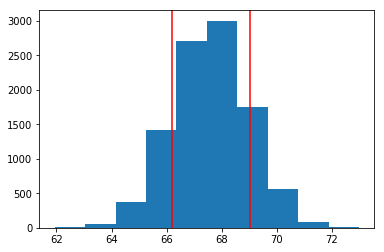

In [58]:
plt.hist(null_sim_dist);
plt.axvline(x=lower_bound, color = 'red');
plt.axvline(x=upper_bound, color = 'red');
plt.show()

+ 第二种方法

In [60]:
null_mean = np.around(full_data.height.mean(),decimals=2)
# 这是从理论层面上计算抽样分布标准差的另一种方法
std_sampling_dist = full_data.height.std()/np.sqrt(5)
num_sims = 10000
null_sims = np.random.normal(null_mean, std_sampling_dist, num_sims)
low_ext = (null_mean - (sample1.height.mean() - null_mean))
high_ext = (null_mean + (sample1.height.mean() - null_mean))

(null_sims > high_ext).mean() + (null_sims < low_ext).mean()

1.6905999999999999

4. 现在，假设你从上面问题2中的样本中得到了相同的样本均值，但是样本数量是1000。对于这1000个值的平均值，你的抽样分布的新标准差是多少？此外，你的新p值是在你设定的零假设和备择假设之间选择的吗？模拟五个值的平均值的抽样分布，查看其形状并绘制一个直方图。在这里根据你的解决方案来回答下面的第二个到最后一个测试题目。

  **提示：**  需要注意的是，如果遇到任何困难，你可以使用测试中的解决方案，尽早找到 p 值，只需稍作更改即可获得该答案。

In [76]:
# get standard deviation for a sample size of 1000
# sample2 = full_data.sample(1000)
null_mean = np.around(full_data.height.mean(),decimals=2)
sampling_dist_mean1000 = []
for _ in range(10000):
    bootstrap_sample = full_data.sample(1000, replace=True)
    bootstrap_mean = bootstrap_sample.height.mean()
    sampling_dist_mean1000.append(bootstrap_mean)
    
std_sampling_dist1000 = np.std(sampling_dist_mean1000)
std_sampling_dist1000

0.09873266088818435

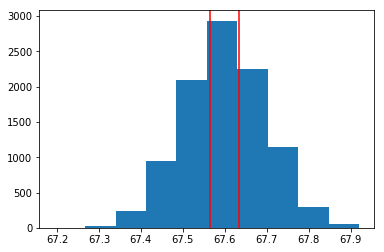

In [84]:
null_vals = np.random.normal(null_mean, std_sampling_dist1000, 10000)

obs_mean = full_data.sample(1000).height.mean()
lower_bound = null_mean - (obs_mean - null_mean)
upper_bound = null_mean + (obs_mean - null_mean)

lower_bound
plt.hist(null_vals);
plt.axvline(x=lower_bound, color = 'red');
plt.axvline(x=upper_bound, color = 'red');
plt.show()
plt.show()

In [85]:
# for a two sided hypothesis, we want to look at anything 
# more extreme from the null in both directions

prob_more_extreme_low = (null_vals < lower_bound).mean()
prob_more_extreme_high = (upper_bound < null_vals).mean()

p_value = prob_more_extreme_low + prob_more_extreme_high
p_value

0.719

5. 通过回答最后一个测试题目，回顾本节内容。